<a href="https://colab.research.google.com/github/Raisler/Profile-Analisys-On-Twitter/blob/main/Elon_Musk_Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELON MUSK AND HIS TWITTER PROFILE

> Maybe is interesting to know more about some people that you want to know, remembering the analysis can be done on another social media or both you choose using the api from Wattson or any free algorithm in internet for sentiment analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Raisler/Profile-Analisys-On-Twitter/main/Data/done.csv')
df

,index,tweets,text_characters,keywords,sentiment,categories
0,0,And no toilet paper,19,toilet paper,neutral,/business and industrial/paper industry
1,1,Watch Demolition Man,20,Watch Demolition Man,neutral,/art and entertainment/movies and tv/television
2,2,Prometheus Unbound,18,Prometheus Unbound,neutral,/style and fashion/underwear
3,3,: The Falcon booster supporting this mission p...,110,Falcon booster,neutral,/automotive and vehicles/vehicle brands
4,4,Not bad,aff,aff,aff,aff
...,...,...,...,...,...,...
495,495,Our tiles are mechanically attached,35,tiles,neutral,/art and entertainment/visual art and design/d...
496,496,It m,aff,aff,aff,aff
497,497,Tiles will be,aff,aff,aff,aff
498,498,"Compilers need to improve imo. Most type, poin...",100,type,neutral,/technology and computing/programming language...


In [ ]:
cdf = df.drop(df[df['categories'] == 'aff'].index)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 499
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            372 non-null    int64 
 1   tweets           372 non-null    object
 2   text_characters  372 non-null    object
 3   keywords         372 non-null    object
 4   sentiment        372 non-null    object
 5   categories       372 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.3+ KB


In [ ]:
cdf = cdf.stack().str.replace('/',' ').drop(columns = 'index').unstack()
cdf.head(5)

,index,tweets,text_characters,keywords,sentiment,categories
0,NaN,And no toilet paper,19,toilet paper,neutral,business and industrial paper industry
1,NaN,Watch Demolition Man,20,Watch Demolition Man,neutral,art and entertainment movies and tv television
2,NaN,Prometheus Unbound,18,Prometheus Unbound,neutral,style and fashion underwear
3,NaN,: The Falcon booster supporting this mission p...,110,Falcon booster,neutral,automotive and vehicles vehicle brands
5,NaN,It was a beast compared to the VIC-20,37,beast,neutral,pets large animals


# PROFILE

The pandas profile is a great library, that library provide many informations about our dataset as you can see below.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(cdf, title='Pandas Profiling Report', explorative=True)
profile

In [ ]:
df.dropna(inplace = True)


# Sentiment Analysis
Here needs a explanation, the sentiment of each tweet is a based in a keyword, the Wattson API chose a keyword that better define the sentence/text, after this, he defines the sentiment by the keyword.

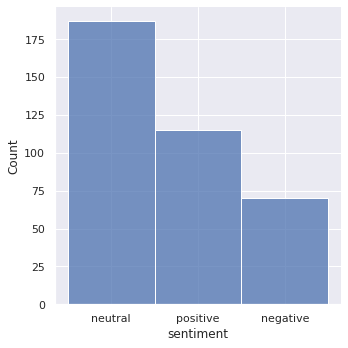

In [ ]:
sns.set_theme(style="darkgrid")
sns.displot(cdf['sentiment'])

# Word Cloud

Word cloud is very useful to common words of a text, article, book, website or even twitter profiles. Lately many informations about what twitter is talking about has been shown in words cloud.

In [ ]:
from wordcloud import WordCloud

In [ ]:
tweets = []
for i in df['tweets']:
  tweets.append(i)

print(tweets[6])

Award accepted on behalf of the great people at Tesla, SpaceX, Neuralink &amp; Boring Co


In [ ]:
import nltk
 
# baixar a base de stopwords
nltk.download('stopwords')
 
# atribuir as stopwords (em português) à variável
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp'])

tweets_cloud = ''.join(tweets)
# How many words
print("Quantidade de Palavras: {}".format(len(tweets_cloud)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Quantidade de Palavras: 25838


## The most used words

Here I got all tweets we have to see what words are the most used in the last two months (2020-10-09 - 2020-12-03).

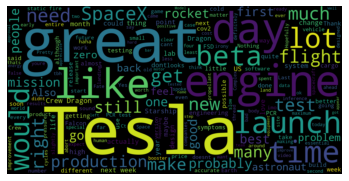

In [ ]:
wordcloud = WordCloud(width=1600, height=800,stopwords = stopwords, background_color="black").generate(tweets_cloud)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
categories = []
for i in cdf['categories']:
  categories.append(i)

print(categories[0])

 business and industrial paper industry


In [ ]:
categories_cloud = ''.join(categories)
# How many words
print("Quantidade de Palavras: {}".format(len(categories_cloud)))

Quantidade de Palavras: 13128


## The main categories

Using the IBM Wattson and his NLP, we can see what Elon Musk is talking about. This is can be useful to search only profiles that talk about technology or space specifically in a period of time in any social media. 

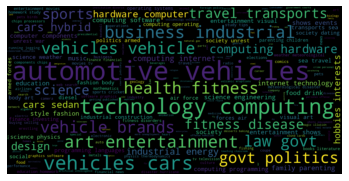

In [ ]:
wordcloud = WordCloud(width=1600, height=800,stopwords = stopwords, background_color="black").generate(categories_cloud)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
keywords = []
for i in df['keywords']:
  keywords.append(i)

print(tweets[0])

And no toilet paper


In [ ]:
keywords_cloud = ''.join(keywords)
# How many words
print("Quantidade de Palavras: {}".format(len(keywords_cloud)))

Quantidade de Palavras: 5371


## The best keywords
Now, what Wattson considered the best keyword about the tweets from Elon Musk?

> 'Crew' was already an expected word, most used for navigations, now for navigations in the space!

> 'Rocket' by SpaceX, one of the companies of Elon Musk

>'PCR' is a exam to detect the covid-19, Elon Musk make many tweets about other things, not only his companies, but probably all his interests.

> 'Tests', 'Beta', 'stage', 'launch','design'...Elon Musk commonly use his twitter to show what his companies are doing, the interesting point is each tweet have only one keyword, and that's keywords show up a lot in just two months of tweets.

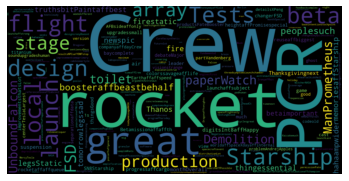

In [ ]:
wordcloud = WordCloud(width=1600, height=800,stopwords = stopwords, background_color="black").generate(keywords_cloud)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()